# Data Loading and process
1. load data
2. check pupulation size
3. create target column and check target incidence

In [82]:
import pandas as pd
import numpy as np

# Read in dataset
df = pd.read_csv('data.csv')
population_size = len(df)
# Rename columns
index = 0
for col in df.columns:
    if col == 'Bankrupt?':
        df.rename(columns={col : 'target'},inplace=True)
    else:
        df.rename(columns={col : 'Attr'+str(index)},inplace=True)
    index += 1    
    
# Checking target incidence
print(df.target.value_counts(normalize=True))

#basetable.columns

0    0.967737
1    0.032263
Name: target, dtype: float64


In [83]:
df.describe()

,target,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr86,Attr87,Attr88,Attr89,Attr90,Attr91,Attr92,Attr93,Attr94,Attr95
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<BarContainer object of 96 artists>

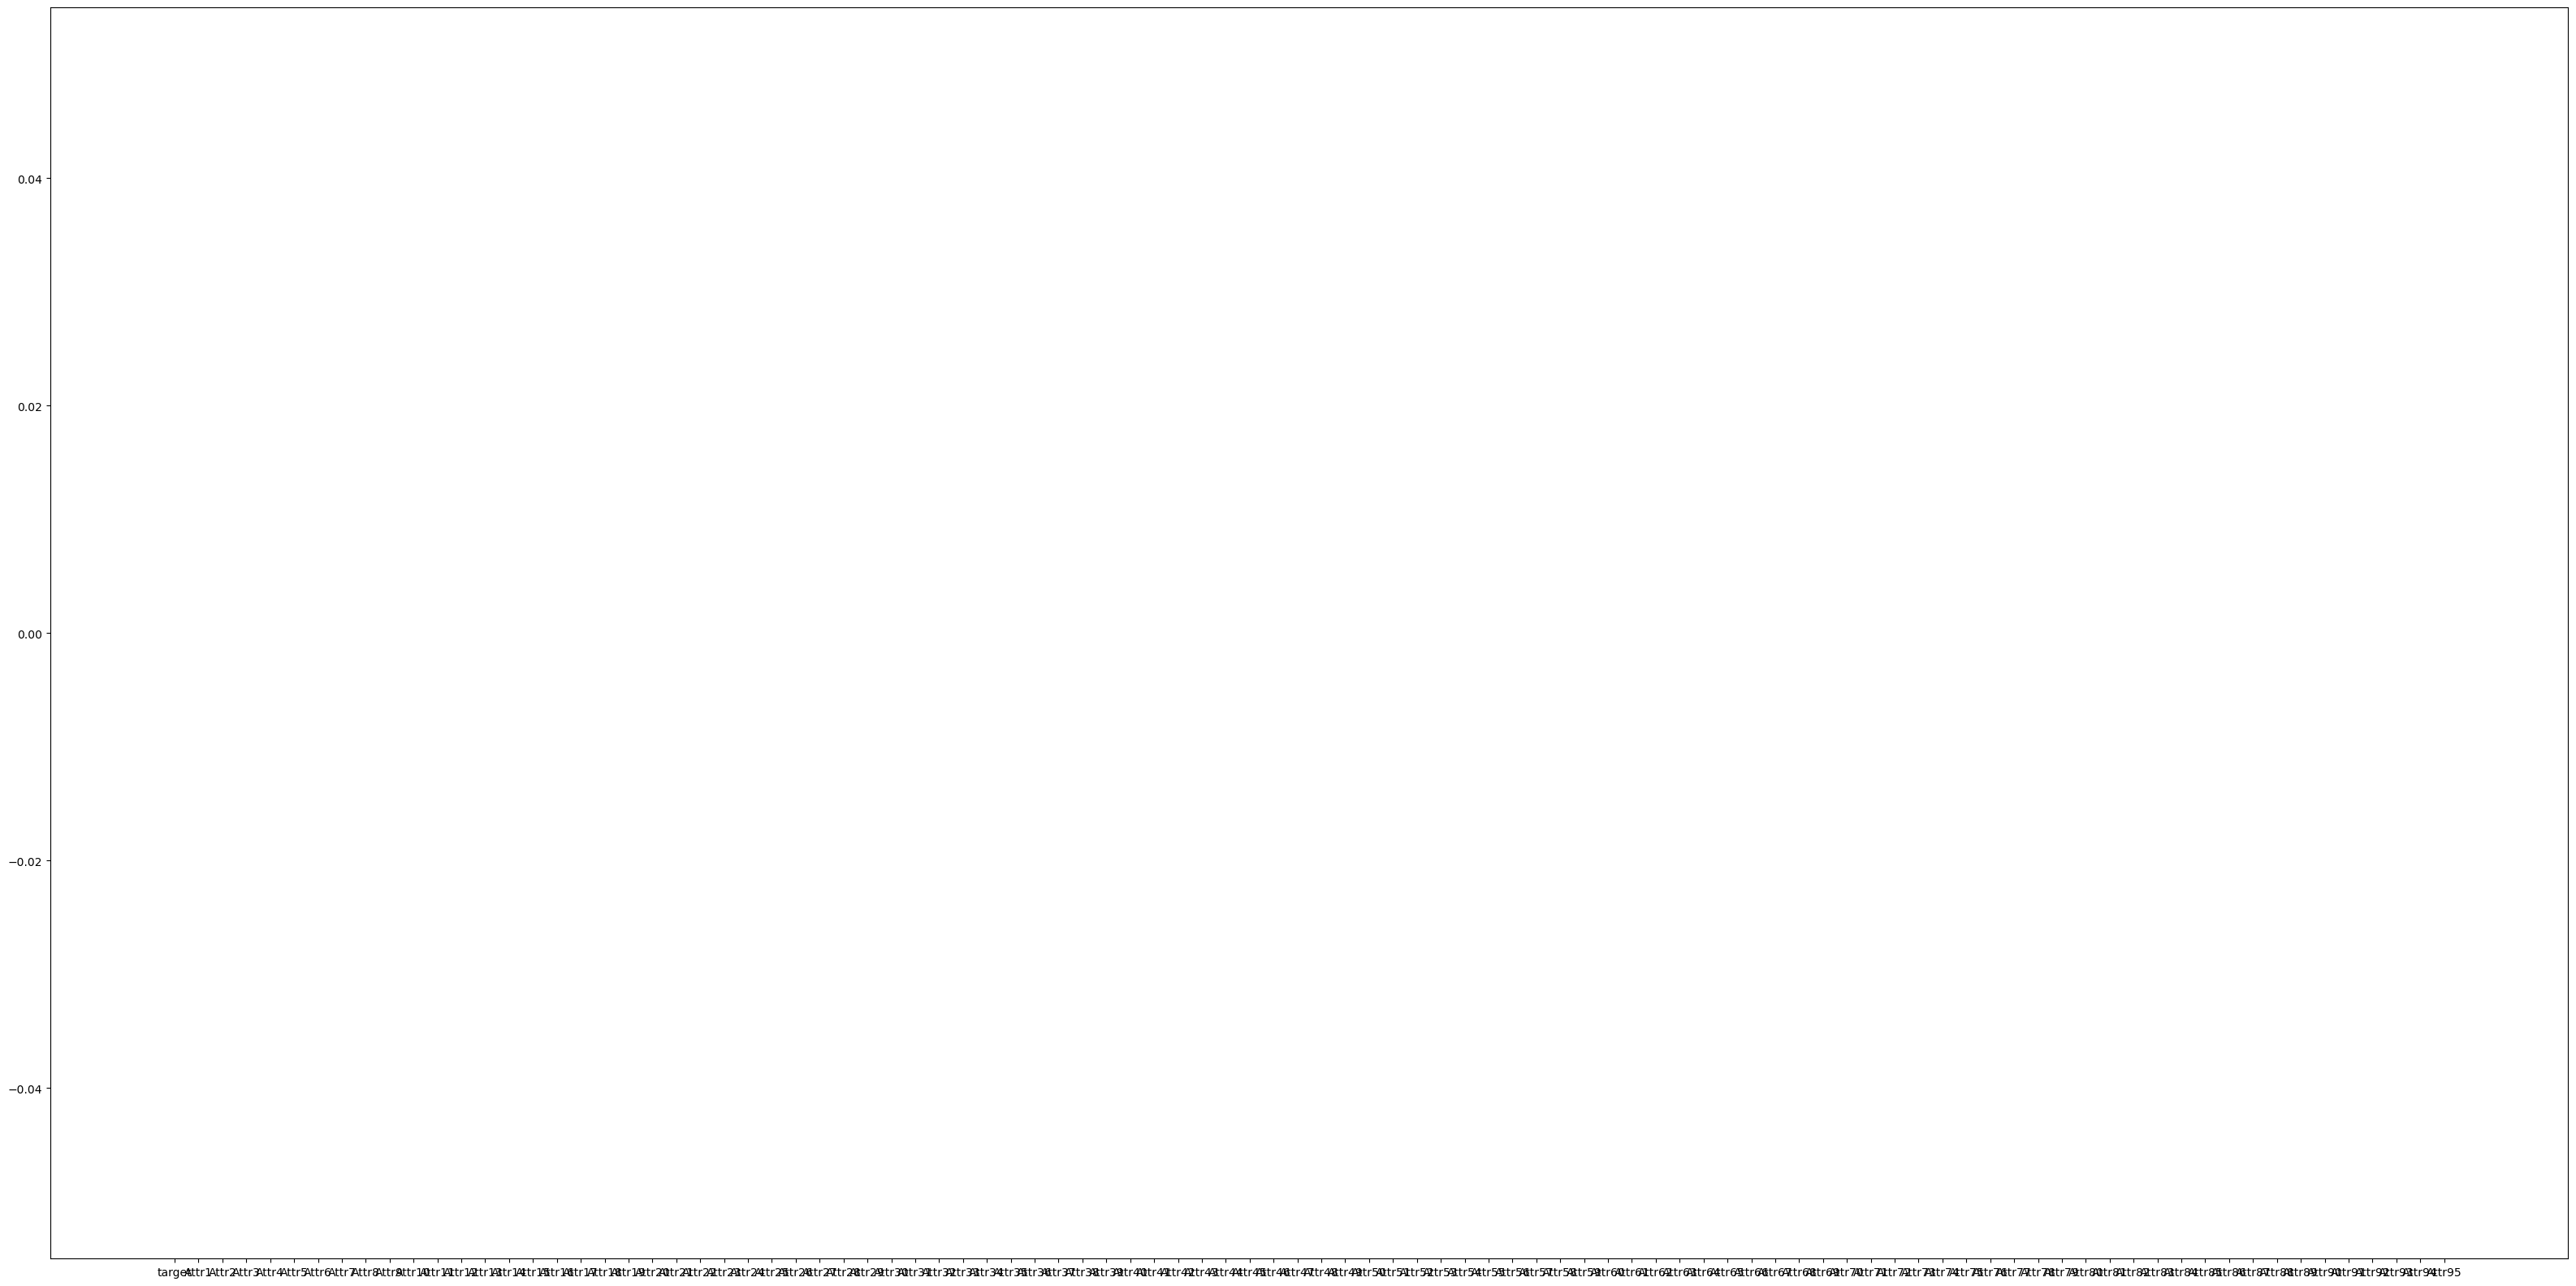

In [84]:
nan_columns = []
nan_values = []
#count the number of  nan values in Dataset and plot a bargraph
for col in df.columns:
    nan_columns.append(col)
    nan_values.append(basetable[col].isnull().sum())

fig, ax = plt.subplots(figsize=(40,20))
plt.bar(nan_columns, nan_values)

array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'Attr1'}>,
        <AxesSubplot:title={'center':'Attr2'}>,
        <AxesSubplot:title={'center':'Attr3'}>,
        <AxesSubplot:title={'center':'Attr4'}>,
        <AxesSubplot:title={'center':'Attr5'}>,
        <AxesSubplot:title={'center':'Attr6'}>,
        <AxesSubplot:title={'center':'Attr7'}>,
        <AxesSubplot:title={'center':'Attr8'}>,
        <AxesSubplot:title={'center':'Attr9'}>],
       [<AxesSubplot:title={'center':'Attr10'}>,
        <AxesSubplot:title={'center':'Attr11'}>,
        <AxesSubplot:title={'center':'Attr12'}>,
        <AxesSubplot:title={'center':'Attr13'}>,
        <AxesSubplot:title={'center':'Attr14'}>,
        <AxesSubplot:title={'center':'Attr15'}>,
        <AxesSubplot:title={'center':'Attr16'}>,
        <AxesSubplot:title={'center':'Attr17'}>,
        <AxesSubplot:title={'center':'Attr18'}>,
        <AxesSubplot:title={'center':'Attr19'}>],
       [<AxesSubplot:title=

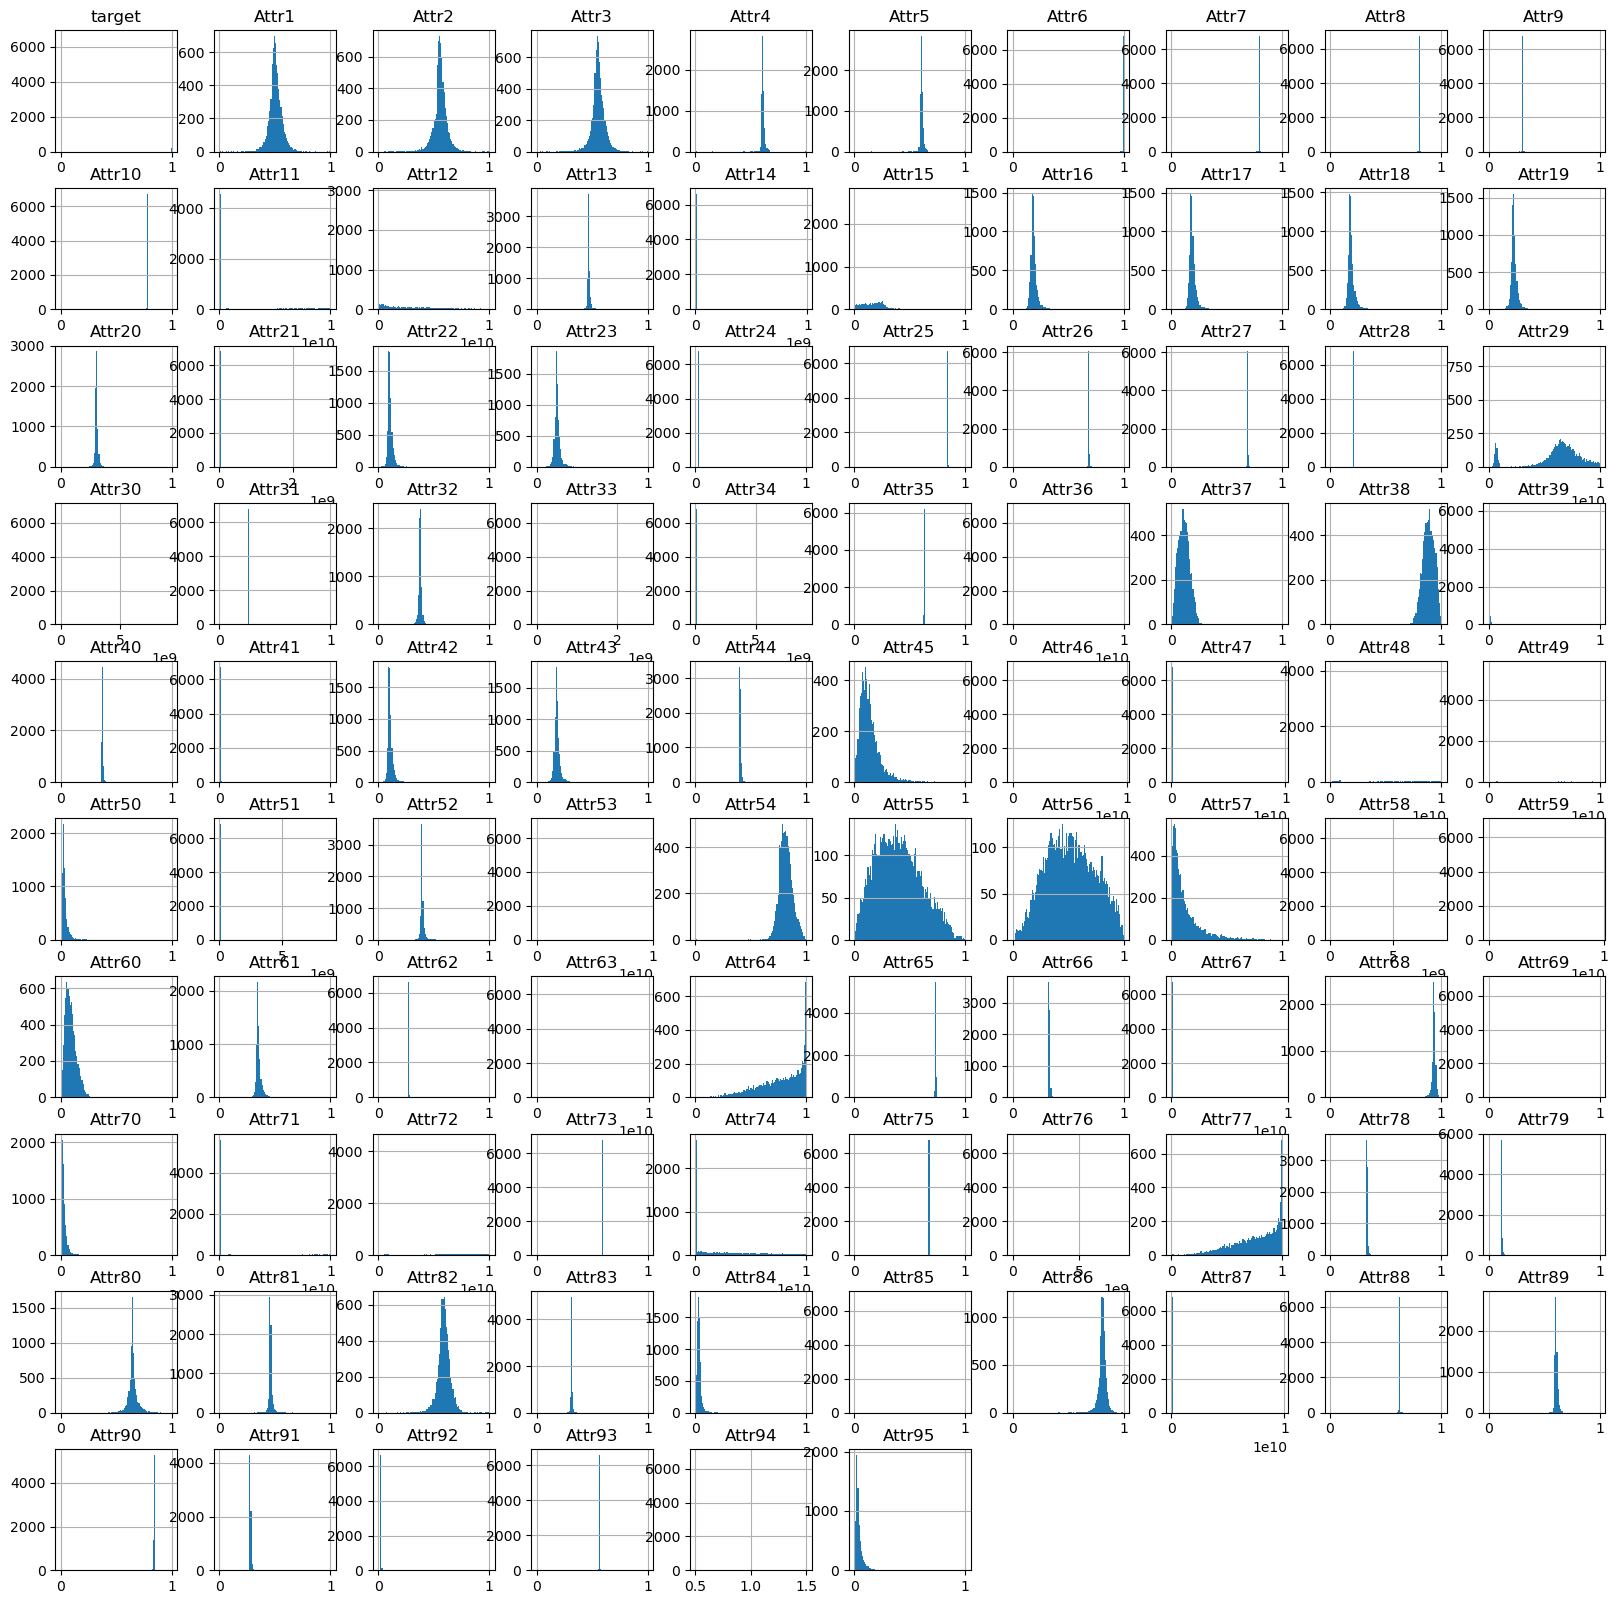

In [85]:
df.hist(bins=100, figsize=(20, 20))

# Splitting transfusion into train and test datasets¶
We'll now use train_test_split() method to split basetable DataFrame.

Target incidence informed us that in our dataset 0s appear 97% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 97%. This is very easy to do using the train_test_split() method from the scikit learn library - all we need to do is specify the stratify parameter. In our case, we'll stratify on the target column.

In [87]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split basetable DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='target'),
    df.target,
    test_size=0.03,
    random_state=42,
    stratify=df.target
)
#print(X_train.head(2))

In [88]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (6614, 95)
X_test shape: (205, 95)
y_train shape: (6614,)
y_test shape: (205,)


In [93]:
print("y_train:",y_train.value_counts(normalize=True))
print("y_test:",y_test.value_counts(normalize=True))

y_train: 0    0.967796
1    0.032204
Name: target, dtype: float64
y_test: 0    0.965854
1    0.034146
Name: target, dtype: float64


## First modeling

### LogisticRegression

In [108]:
# Importing modules
from sklearn import linear_model

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train,y_train)

# AUC score for logistic regression model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.5281


### KNeighborsClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=71)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9658536585365853


/Users/zoeychiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Selecting model using TPOT
TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a scikit-learn pipeline, meaning it will include any pre-processing steps as well as the model.

We are using TPOT to help us zero in on one model that we can then explore and optimize further.

In [94]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

/Users/zoeychiu/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9242514896553837

Generation 2 - Current best internal CV score: 0.9242514896553837

Generation 3 - Current best internal CV score: 0.9242514896553837

Generation 4 - Current best internal CV score: 0.9242514896553837

Generation 5 - Current best internal CV score: 0.9242514896553837

Best pipeline: KNeighborsClassifier(StandardScaler(input_matrix), n_neighbors=71, p=1, weights=distance)

AUC score: 0.8918

Best pipeline steps:
1. StandardScaler()
2. KNeighborsClassifier(n_neighbors=71, p=1, weights='distance')


# Checking the variance
TPOT picked LogisticRegression as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.8918. This is a great starting point. Let's see if we can make it better.

One of the assumptions for linear models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's orders of magnitude greater than the other features, this could impact the model's ability to learn from other features in the dataset.

Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.

In [95]:
# X_train's variance, rounding the output to 3 decimal places
print(X_train.var().round(3))
tpot.export('tpot_digits_pipeline.py')

Attr1     0.004
Attr2     0.004
Attr3     0.004
Attr4     0.000
Attr5     0.000
          ...  
Attr91    0.000
Attr92    0.000
Attr93    0.000
Attr94    0.000
Attr95    0.002
Length: 95, dtype: float64


## StandarScanler

In [105]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler
# Scale the features and set the values to a new variable
scaler = StandardScaler()
# Scale train_features and test_features
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## KNeighborsClassifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
print(knn.score(scaled_X_test, y_test))

0.9609756097560975


/Users/zoeychiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Training the logistic regression model¶


In [107]:
# Importing modules
from sklearn import linear_model

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(scaled_X_train,y_train)

# AUC score for logistic regression model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(scaled_X_test)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')

#print(logreg.coef_)
#print(logreg.intercept_)


AUC score: 0.8304


In [6]:
# Importing itemgetter
from operator import itemgetter

# Sort models based on their AUC score from highest to lowest
sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key=itemgetter(1),
    reverse=True
)

[('tpot', 0.8917748917748917), ('logreg', 0.5281385281385281)]